In [2]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [3]:
df_oob = pd.read_csv("./results/oob_pw.csv")
df_opt = pd.read_csv("./results/op_pw_0.csv")
df_oob = df_oob[df_oob['m'] != 256]
df_opt = df_opt[df_opt['m'] != 256]

df_oob = df_oob[df_oob['m'] != 3072]
df_opt = df_opt[df_opt['m'] != 3072]

pd.options.display.max_rows = 999
confs = list(df_oob['conf'].values)
unq_m = df_oob['m'].unique()
n_confs = int(df_oob.shape[0] / len(unq_m))
df_opt

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
1,f16_m2,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,0.84%,0.61%,245.137215,1.095042,0.760,33.0,24.0,1000.0,45.62500,300
2,f16_m2,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,6.68%,4.86%,245.331128,8.753409,0.760,36.0,27.0,1000.0,48.18750,300
3,f16_m2,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,33.02%,24.01%,396.983624,43.276015,0.760,41.0,30.0,1000.0,49.87500,300
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,24.83%,18.06%,4223.375320,32.542444,0.758,55.5,43.0,1000.0,53.53125,300
6,f16_m2,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,29.58%,21.51%,28362.441063,38.766467,0.746,58.5,44.5,976.0,54.68750,300
8,f16_m4,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,1.63%,1.18%,251.964728,1.065369,0.758,43.0,34.0,1000.0,53.50000,300
9,f16_m4,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,12.61%,9.17%,259.942214,8.261389,0.760,43.0,34.0,1000.0,53.43750,300
10,f16_m4,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,39.85%,28.98%,657.783349,26.117823,0.753,43.0,34.0,1000.0,53.12500,300
12,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,34.28%,24.93%,6117.087205,22.468039,0.760,56.0,42.5,1000.0,53.56250,300
13,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,38.07%,27.69%,44072.322051,24.947894,0.760,57.5,43.5,1000.0,55.06250,300


In [4]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [5]:
df_opt = df_opt.loc[df_opt['conf'].isin(df_oob['conf'].unique()) & df_opt['m'].isin(df_oob['m'].unique())]
df_opt

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
1,f16_m2,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,0.84%,0.61%,245.137215,1.095042,0.760,33.0,24.0,1000.0,45.62500,300
2,f16_m2,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,6.68%,4.86%,245.331128,8.753409,0.760,36.0,27.0,1000.0,48.18750,300
3,f16_m2,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,33.02%,24.01%,396.983624,43.276015,0.760,41.0,30.0,1000.0,49.87500,300
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,24.83%,18.06%,4223.375320,32.542444,0.758,55.5,43.0,1000.0,53.53125,300
6,f16_m2,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,29.58%,21.51%,28362.441063,38.766467,0.746,58.5,44.5,976.0,54.68750,300
8,f16_m4,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,1.63%,1.18%,251.964728,1.065369,0.758,43.0,34.0,1000.0,53.50000,300
9,f16_m4,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,12.61%,9.17%,259.942214,8.261389,0.760,43.0,34.0,1000.0,53.43750,300
10,f16_m4,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,39.85%,28.98%,657.783349,26.117823,0.753,43.0,34.0,1000.0,53.12500,300
12,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,34.28%,24.93%,6117.087205,22.468039,0.760,56.0,42.5,1000.0,53.56250,300
13,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,38.07%,27.69%,44072.322051,24.947894,0.760,57.5,43.5,1000.0,55.06250,300


In [6]:
df_oob_inf = get_column_df_info(df_oob, 'tflops')
df_opt_inf = get_column_df_info(df_opt, 'tflops')
# df_opt_inf.columns = [str(c + "_opt") for c in df_opt_inf.columns]
# df_inf = pd.concat([df_oob_inf, df_opt_inf], axis=1)
# df_inf

In [7]:
df_oob_inf

,f32_m4,f16_m4,f16_m2,f8b_m2,f8b_m0,f4b_m0
512,1.239255,1.162988,1.272558,1.251695,1.227777,1.227170
1024,5.212198,9.337691,9.606108,10.088031,9.894324,9.935689
2048,9.461977,17.377289,18.882770,26.340306,28.089526,32.147663
4096,10.481887,22.358068,29.805887,40.471515,50.984673,57.510121
8192,14.745985,24.491027,33.687388,40.326598,46.782273,49.781182


In [8]:
df_opt_inf

,f16_m2,f16_m4
512,1.095042,1.065369
1024,8.753409,8.261389
2048,43.276015,26.117823
4096,32.542444,22.468039
8192,38.766467,24.947894


## Inference

In [9]:
df_oob_inf 

,f32_m4,f16_m4,f16_m2,f8b_m2,f8b_m0,f4b_m0
512,1.239255,1.162988,1.272558,1.251695,1.227777,1.227170
1024,5.212198,9.337691,9.606108,10.088031,9.894324,9.935689
2048,9.461977,17.377289,18.882770,26.340306,28.089526,32.147663
4096,10.481887,22.358068,29.805887,40.471515,50.984673,57.510121
8192,14.745985,24.491027,33.687388,40.326598,46.782273,49.781182


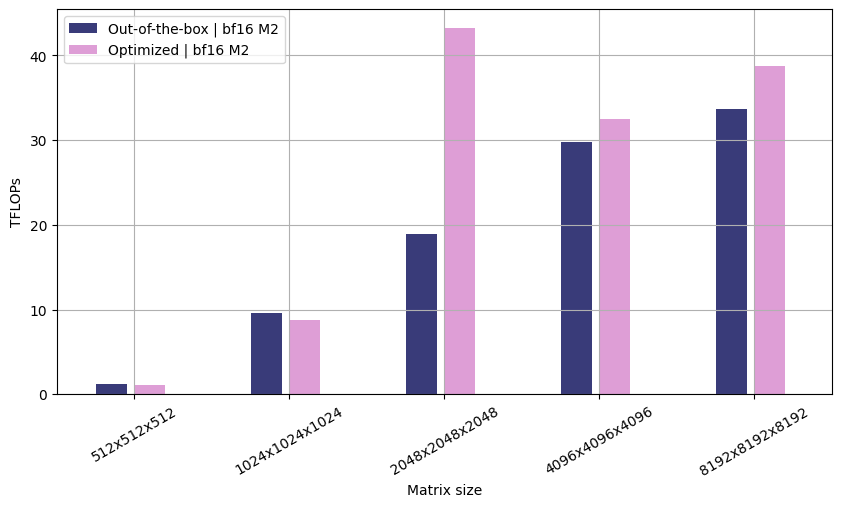

In [11]:
fig, ax = plt.subplots()
conf = 'f16_m2'
df_concat = pd.concat([df_oob_inf[conf], df_opt_inf[conf]], axis=1)
df_concat.columns = ['Out-of-the-box | bf16 M2','Optimized | bf16 M2']
plot = df_concat.plot(kind='bar', figsize=(10, 5), colormap="tab20b", ax=ax)
plot.set_xticklabels([f"{k}x{k}x{k}" for k in df_opt_inf.index], rotation=30)
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)
plt.ylabel("TFLOPs")
plot.legend(loc='upper left')
plt.xlabel("Matrix size")
plt.grid(True)
plt.show()

plt.show()